# Задание 3. Pandas (HW)
### Используя библиотеку pandas (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.  
Результат прислать в формате ссылки на Github с ноутбуком

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Анализ вспомогательных таблиц

### lectures.csv : метаданные для лекций, просмотренных студентами по мере их обучения.

**lecture_id**: внешний ключ для столбца content_type_id в train.csv, если тип контента - лекция (1).  
**part**: раздел, к которому относится лекция.  
**tag**: один тег для каждой лекции. Значения тегов не представлены, но их достаточно для кластеризации лекций.  
**type_of**: краткое описание основной цели лекции.

In [80]:
lectures_df = pd.read_csv('data\lectures.csv', encoding = 'utf-8')
lectures_df.shape

(418, 4)

In [25]:
lectures_df.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


##### Выводим статистику по числовым признакам датафрейма df_lectures c помощью метода .describe

In [26]:
lectures_df.describe() 

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


##### Ищем пропуски в датафрейме df_lectures

In [27]:
lectures_df.isna().sum() 

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

##### Как мы можем увидеть пропуски в датафрейме student_df равны 0, то есть - отсутствуют

##### Теперь перейдем к поиску дубликатов в нашем датафрейм

In [28]:
lectures_df.duplicated().sum()

0

##### Выводим справку о кол-ве значений в каждом столбце и типе данных нашего датафрейма 

In [29]:
lectures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


##### Выводим распеределение внешних ключей по различным разделам лекций

In [30]:
lectures_df[['type_of', 'part', 'lecture_id']].groupby(['type_of','part'], as_index = False).count().sort_values(by = ['type_of', 'part'])

,type_of,part,lecture_id
0,concept,1,20
1,concept,2,18
2,concept,3,7
3,concept,4,19
4,concept,5,72
5,concept,6,63
6,concept,7,23
7,intention,2,7
8,solving question,1,34
9,solving question,2,31


##### Выводим распеределение тегов и разделов

<AxesSubplot: xlabel='part', ylabel='tag'>

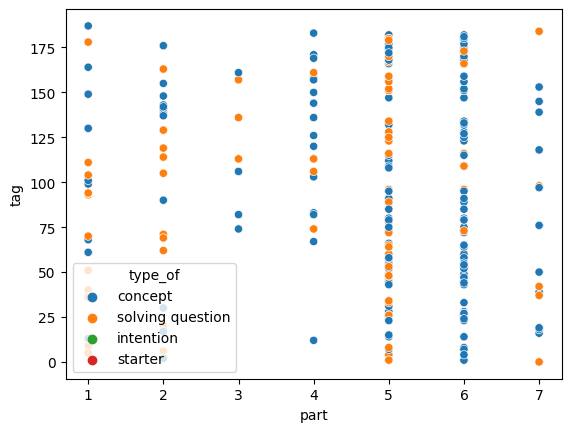

In [31]:
sns.scatterplot(data = lectures_df, x = 'part', y = 'tag', hue = 'type_of')

<AxesSubplot: xlabel='tag', ylabel='Count'>

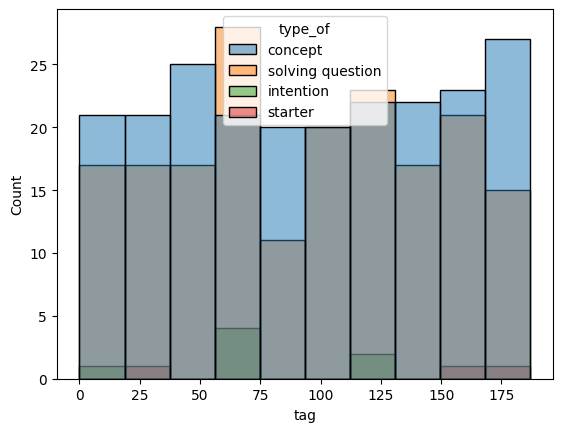

In [32]:
sns.histplot(data = lectures_df, x = 'tag', hue = 'type_of')

##### И видим что явной связи тегов и описаний лекций и нет вовсе

##### Тыперь проанализируем связь разделов и описаний лекций

<AxesSubplot: xlabel='part', ylabel='Count'>

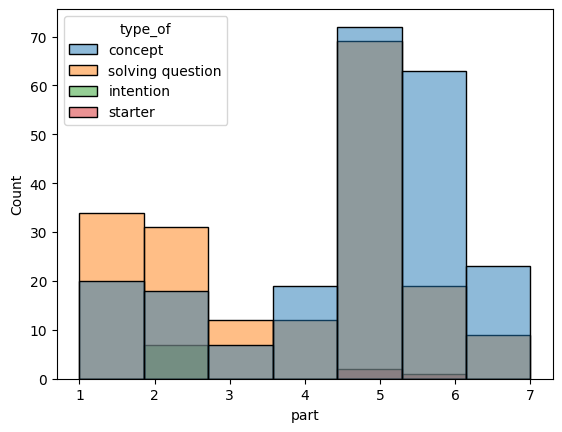

In [33]:
sns.histplot(data = lectures_df, x = 'part', hue = 'type_of', bins = 7)

##### В итоге: в первых 3-х разделах больше практики, в остальных - теории

### questions.csv : метаданные для заданных студентам вопросов.

**question_id**: внешний ключ для столбца content_type_id в train.csv, если тип контента - вопрос (0).  
**bundle_id**: идентификатор совместного набора вопросов.  
**correct_answer**: правильный ответ на вопрос. Можно сравнить со столбцом user_answer в train.csv, чтобы проверить, верно ли ответил студент.  
**part**: соответствующий раздел теста TOEIC.  
**tags**: один или несколько подробных тегов для каждого вопроса. Значения тегов не представлены, но их достаточно для кластеризации вопросов.

In [34]:
questions_df = pd.read_csv('data/questions.csv') 
questions_df.shape

(13523, 5)

#### Выводим строки датафрейма questions_df c помощью метода .head

In [35]:
questions_df.head() 

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [36]:
questions_df.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


##### Поиск пропусков в датафрейме questions_df с помощью метода .isna() - есть 1 в столбце тегов

In [37]:
questions_df.isna().sum() 

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

##### Поиск пропусков показал что есть один пропуск в столбце тегов
##### Выведем информацию о том, где он находится

In [38]:
questions_df[questions_df.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


##### Проверим есть ли в датафрейме questions_df дубликаты

In [39]:
questions_df.duplicated().sum() 

0

##### В датафрейме questions_df дубликаты отсутствуют
##### Теперь мы выведем справку о количестве значений в каждом столбце и типе данных датафрейма questions_df

In [40]:
questions_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


##### Рассмотрим количество значений внешних ключей, соответствующих каждому значению в столбце разделов

In [41]:
questions_df[['part', 'question_id']].groupby(['part'], as_index = False).count()

,part,question_id
0,1,992
1,2,1647
2,3,1562
3,4,1439
4,5,5511
5,6,1212
6,7,1160


<AxesSubplot: xlabel='part', ylabel='Count'>

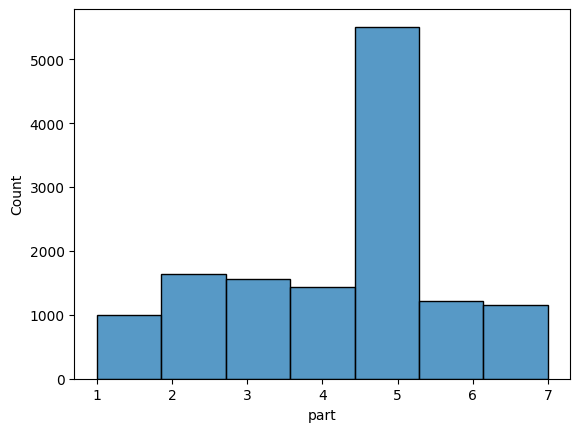

In [42]:
sns.histplot(data = questions_df, x = 'part', bins = 7)

##### Внешние ключи по всем разделам распределены практически без отклонений, кроме пятого.

## Анализ основной таблицы

### train.csv : метаданные ответов на заданные студентам вопросы.

**row_id**: (int64) идентификатор строки.  
**timestamp**: (int64) время в миллисекундах между этим взаимодействием со студентом и завершением первого события от данного студента.  
**user_id**: (int32) идентификатор студента.  
**content_id**: (int16) идентификатор взаимодействия со студентом.  
**content_type_id**: (int8) идентификатор типа контента. 0, если контентом был заданный студенту вопрос, 1 - просмотр студентом лекции.  
**task_container_id**: (int16) идентификатор набора вопросов или лекций. Например, студент может увидеть три вопроса подряд, прежде чем увидит пояснения к какому-либо из них. Все три вопроса будут иметь общий идентификатор набора.  
**user_answer**: (int8) ответ студента на вопрос, если они есть. Для лекций считать -1 как null.  
**answered_correctly**: (int8) был ли ответ студента на вопрос правильным. Для лекций считать -1 как null.  
**prior_question_elapsed_time**: (float32) среднее время в миллисекундах, затрачиваемое студентом для ответа на каждый вопрос из предыдущего набора вопросов, без учёта промежуточных лекций. Имеет значение null для 1-го набора вопросов или лекции.  
**prior_question_had_explanation**: (bool) увидел ли студент объяснение и правильный ответ после ответа на предыдущий набор вопросов, без учёта промежуточных лекций. Это значение является общим для одного набора вопросов и имеет значение null для 1-го набора вопросов или лекции. Как правило, первые несколько вопросов, увиденные студентом, были частью вводного диагностического теста и не получили никакой обратной связи.

In [81]:
df = pd.read_csv('data/train.csv', encoding = 'utf-8')
df.shape

(101230332, 10)

#### Выводим строки датафрейма df при помощи метода .head

In [44]:
df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


### Произведем анализ датафрема df на то, какие у нас есть категориальные и числовые столбцы

In [83]:
cat_col = []
num_col = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_col += [column_name]
    else:
        num_col += [column_name]

print('Категориальные данные:\t ',cat_col, '\n Число столбцов =', len(cat_col))
print('Числовые данные:\t ', num_col, '\n Число столбцов =', len(num_col))

Категориальные данные:	  ['prior_question_had_explanation'] 
 Число столбцов = 1
Числовые данные:	  ['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time'] 
 Число столбцов = 9


#### Выводим статистику по числовым признакам датафрейма df c помощью метода .describe

In [85]:
df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


### Рассмотрим гистограммы (распределение) значений по каждому числовому признаку (столбцу)
##### Сначала столбцы с "большими" значениями

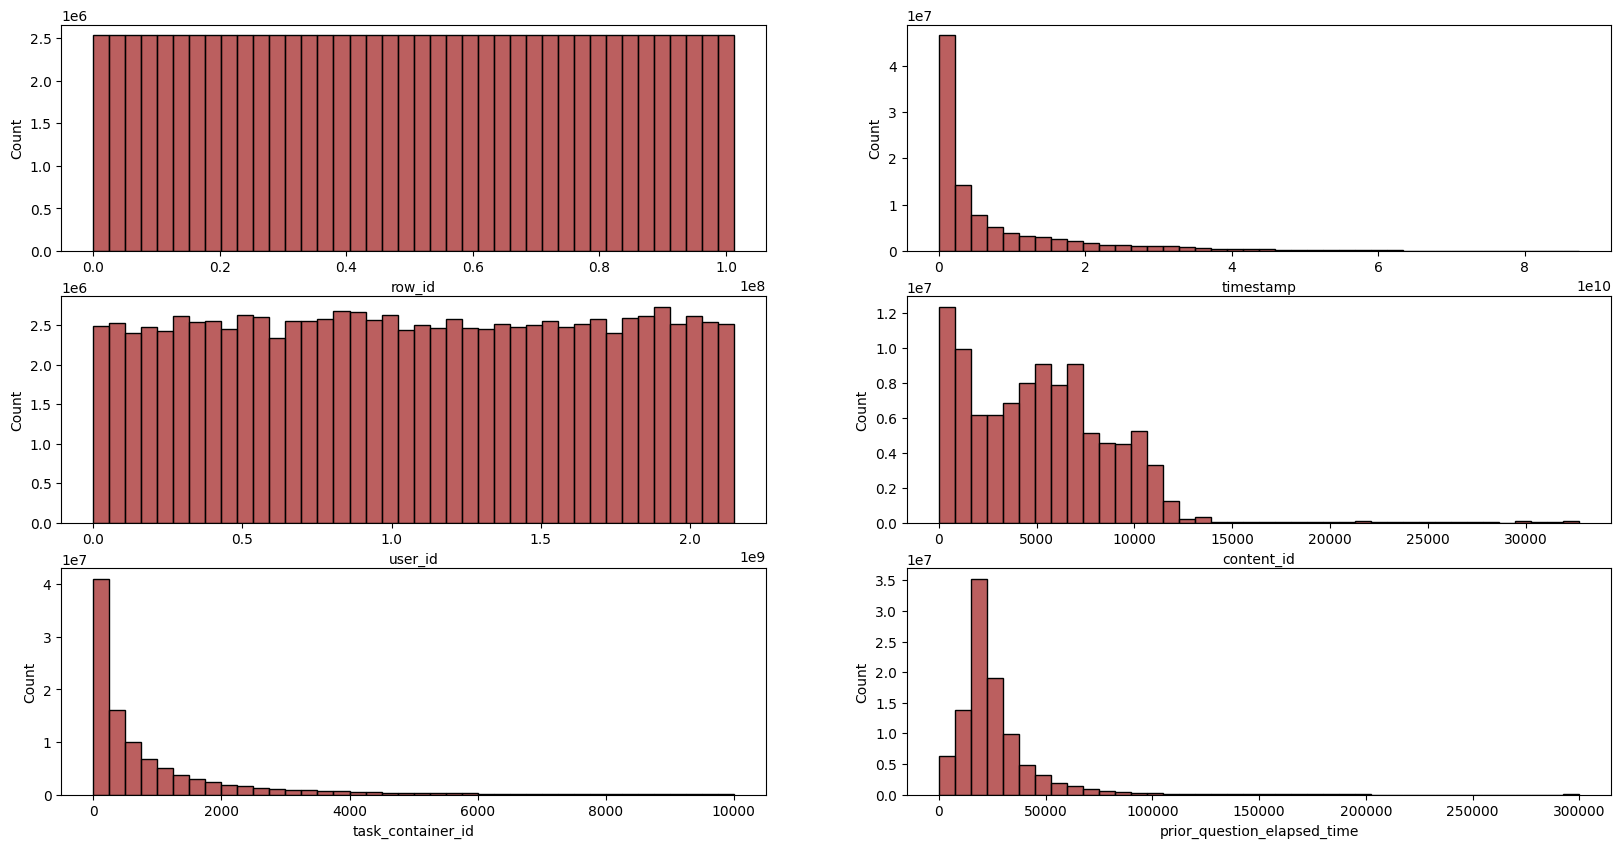

In [88]:
num_col_big = ['row_id', 'timestamp', 'user_id', 'content_id', 'task_container_id', 'prior_question_elapsed_time']
width = 2
height = int(np.ceil(len(num_col_big) / width))
fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (20, 15))

for idx, column_name in enumerate(num_col_big):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data = df, x = column_name, bins = 40, color = 'brown')

##### Теперь столбцы с "маленькими" значениями

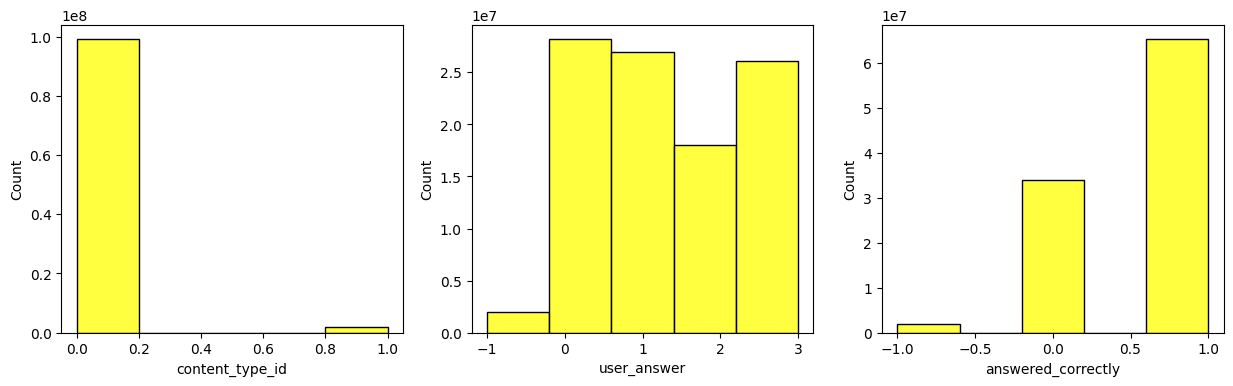

In [89]:
num_col_small = ['content_type_id', 'user_answer', 'answered_correctly']
width = 3
height = int(np.ceil(len(num_col_small) / width))
fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (15, 4))

for idx, column_name in enumerate(num_col_small):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data = df, x = column_name, bins = 5, color = 'yellow')

### Проведём очистку данных:

In [90]:
# Ищем пропуски в датафрейме df - есть 23723 в столбце времени ответа на каждый вопрос
# и 3816 в столбце просмотра объяснений и правильных ответов
df.isna().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

##### В столбце времени ответа на каждый вопрос есть 2351538 пропуска
##### В столбце просмотра объяснений и правильных ответов их 392506 

### Выведем пропуски в столбце времени ответа на каждый вопрос.

In [91]:
# Выводим пропуски в столбце времени ответа на каждый вопрос. 
# Они обусловлены условием: имеет значение null для 1-го набора вопросов или лекции.
df[df.prior_question_elapsed_time.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
89,89,653762,2746,6808,1,14,-1,-1,NaN,False
96,96,0,5382,5000,0,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
101230195,101230195,1073593458,2147482216,21887,1,170,-1,-1,NaN,False
101230218,101230218,1240316256,2147482216,6808,1,193,-1,-1,NaN,False
101230220,101230220,1240470616,2147482216,27699,1,195,-1,-1,NaN,False
101230222,101230222,1240524060,2147482216,5752,1,197,-1,-1,NaN,False


##### Они обусловлены условием: имеет значение null для 1-го набора вопросов или лекции.

### Теперь выведем пропуски в столбце просмотра объяснений и правильных ответов. 

In [92]:
df[df.prior_question_had_explanation.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
96,96,0,5382,5000,0,0,0,1,NaN,NaN
224,224,0,8623,3915,0,0,3,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
101228989,101228989,0,2147470770,7900,0,0,0,1,NaN,NaN
101229217,101229217,0,2147470777,7900,0,0,2,0,NaN,NaN
101229975,101229975,0,2147481750,4137,0,0,0,0,NaN,NaN
101230025,101230025,0,2147482216,3748,0,0,1,0,NaN,NaN


##### Они обусловлены условием: имеет значение null для 1-го набора вопросов или лекции.

### Произведем поиск дубликатов в датафрейм df

In [93]:
df.duplicated().sum()

0

##### Количество пропусков равно 0, то есть отсутствуют.

### Теперь получим справку о количествеве значений в каждом столбце и формате данных датафрейма df с помощью метода .info

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


**Из представленных данных можно сделать следующие выводы:**
- столбец **row_id** совпадает с индексом датафрейма df и может быть удален
- датафрейм df занимает 7.5+ GB памяти
- имеет смысл изменить формат хранения некоторых данных для уменьшения объёма памяти, занимаемой датафреймом, и увеличения скорости исследования

### Из выщеперечисленных выводов произведем, следующее:
- ##### Удалим столбец row_id
- ##### Изменим типы данных во всех столбцах датафрейма df при помощи метода .astype

In [97]:
df = df.drop('row_id', axis = 1)
df['timestamp'] = df['timestamp'].astype('uint64')
df['user_id'] = df['user_id'].astype('uint32')
df['content_id'] = df['content_id'].astype('uint16')
df['content_type_id'] = df['content_type_id'].astype('int8')
df['task_container_id'] = df['task_container_id'].astype('uint16')
df['user_answer'] = df['user_answer'].astype('int8')
df['answered_correctly'] = df['answered_correctly'].astype('int8')
df['prior_question_elapsed_time'] = df['prior_question_elapsed_time'].astype('float32')

KeyError: "['row_id'] not found in axis"

### Выведем обновленную информацию датафрейма при помощи метода .info

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       uint64 
 1   user_id                         uint32 
 2   content_id                      uint16 
 3   content_type_id                 int8   
 4   task_container_id               uint16 
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float32
 8   prior_question_had_explanation  object 
dtypes: float32(1), int8(3), object(1), uint16(2), uint32(1), uint64(1)
memory usage: 2.9+ GB


### Получим во сколько раз изменился размер датафрейма

In [98]:
print(round(7.5 / 2.9, 1))

2.6


После выполненных процедур объем памяти занимаемый датафремом уменьшился в 2,6 раза

### Рассмотрим корреляцию числовых признаков и их связь с успеваемостью студентов

In [99]:
cm = sns.color_palette("vlag", as_cmap = True)
df_corr = df.loc[:,['timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time']]
df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
timestamp,1.000000,-0.000041,0.052931,0.000974,0.433359,0.000724,0.025452,0.013934
user_id,-0.000041,1.000000,0.000868,-0.000150,0.001498,0.000156,-0.000307,0.000308
content_id,0.052931,0.000868,1.000000,0.414640,0.046304,-0.106668,-0.196960,0.151661
content_type_id,0.000974,-0.000150,0.414640,1.000000,-0.019647,-0.279818,-0.436912,nan
task_container_id,0.433359,0.001498,0.046304,-0.019647,1.000000,0.008532,0.061129,-0.013412
user_answer,0.000724,0.000156,-0.106668,-0.279818,0.008532,1.000000,0.126471,0.014570
answered_correctly,0.025452,-0.000307,-0.196960,-0.436912,0.061129,0.126471,1.000000,-0.007900
prior_question_elapsed_time,0.013934,0.000308,0.151661,nan,-0.013412,0.014570,-0.007900,1.000000


### Добавляем столбец соотношения кол-ва правильных ответов к количеству ответов студентов и выведем обновленную корреляцию числовых признаков

In [100]:
df_corr['cor_ratio'] = df_corr.answered_correctly / df_corr.user_answer
df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,cor_ratio
timestamp,1.000000,-0.000041,0.052931,0.000974,0.433359,0.000724,0.025452,0.013934,0.024417
user_id,-0.000041,1.000000,0.000868,-0.000150,0.001498,0.000156,-0.000307,0.000308,-0.000491
content_id,0.052931,0.000868,1.000000,0.414640,0.046304,-0.106668,-0.196960,0.151661,0.078863
content_type_id,0.000974,-0.000150,0.414640,1.000000,-0.019647,-0.279818,-0.436912,nan,0.244676
task_container_id,0.433359,0.001498,0.046304,-0.019647,1.000000,0.008532,0.061129,-0.013412,0.039900
user_answer,0.000724,0.000156,-0.106668,-0.279818,0.008532,1.000000,0.126471,0.014570,-0.529601
answered_correctly,0.025452,-0.000307,-0.196960,-0.436912,0.061129,0.126471,1.000000,-0.007900,0.532950
prior_question_elapsed_time,0.013934,0.000308,0.151661,nan,-0.013412,0.014570,-0.007900,1.000000,-0.016830
cor_ratio,0.024417,-0.000491,0.078863,0.244676,0.039900,-0.529601,0.532950,-0.016830,1.000000


### Удаляем ненужные столбцы и выведем обновленную корреляцию числовых признаков

In [101]:
df_corr.drop(df_corr.columns[[0, 1, 2, 4, 7]], axis = 1, inplace = True)
df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,content_type_id,user_answer,answered_correctly,cor_ratio
content_type_id,1.000000,-0.279818,-0.436912,0.244676
user_answer,-0.279818,1.000000,0.126471,-0.529601
answered_correctly,-0.436912,0.126471,1.000000,0.532950
cor_ratio,0.244676,-0.529601,0.532950,1.000000


### Теперь выведем распределение успеваемости студентов

<AxesSubplot: xlabel='cor_ratio', ylabel='Count'>

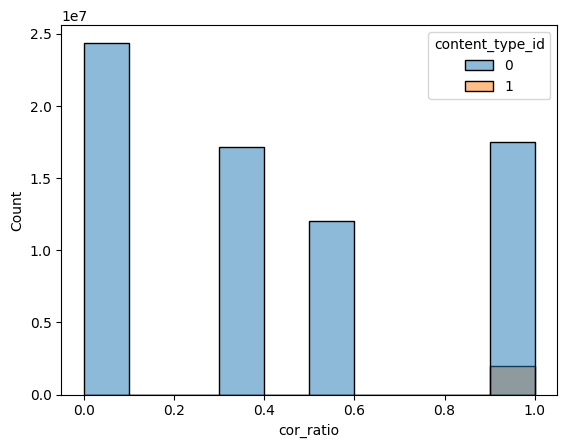

In [102]:
sns.histplot(data = df_corr, x = 'cor_ratio', hue = 'content_type_id', bins = 10)

### По представленной корреляции числовых признаков видно, что помимо исходных для неё признаков успеваемость слабо зависит от типа контента (вопрос или лекция).

### Рассмотрим статистику ответов студентов  

##### Произведем поиск уникальных индетификаторов студентов

In [103]:
df.agg({'user_id': pd.Series.nunique}) 

user_id    393656
dtype: int64

##### Сгруппируем общее кол-во ответов и кол-во правильных ответов каждого студента по его идентификатору в датафрейм unique_df

In [104]:
unique_df = df[['user_id', 'user_answer', 'answered_correctly']].groupby(['user_id'], as_index = False).sum()
unique_df.head()


,user_id,user_answer,answered_correctly
0,115,72,32
1,124,49,7
2,2746,31,10
3,5382,169,81
4,8623,149,67


##### Выведем статистику датафрейма unique_df

In [105]:
unique_df.describe()

,user_id,user_answer,answered_correctly
count,3.936560e+05,393656.000000,393656.000000
mean,1.076358e+09,353.875889,160.763700
std,6.201319e+08,1038.467530,507.219402
min,1.150000e+02,0.000000,-11.000000
25%,5.387596e+08,37.000000,11.000000
50%,1.077717e+09,60.000000,23.000000
75%,1.613533e+09,214.000000,92.000000
max,2.147483e+09,25162.000000,14229.000000


##### Создадим функцию которая произведет сокращение разброса количества ответов студентов

In [63]:
def rem_emission(df, col, k_std): # задаём функцию сокращения разброса ответов
        mean = df[col].mean() # среднее значение переданного столбца col
        std_o = df[col].std() # стандартное отклонение переданного столбца col
        return df[(df[col] <= mean + (k_std * std_o))]

,user_id,user_answer,answered_correctly,cor_ratio
0,115,72,32,0.444444
1,124,49,7,0.142857
2,2746,31,10,0.322581
3,5382,169,81,0.479290
4,8623,149,67,0.449664
...,...,...,...,...
3819,20913319,575,233,0.405217
3820,20913864,20,7,0.350000
3821,20938253,739,308,0.416779
3822,20948951,78,31,0.397436


##### Применяем функцию сокращения разброса ответов 

In [106]:
unique_df = rem_emission(unique_df, 'user_answer', 1) 

##### Добавляем столбец cor_ratio успеваемости (соотношения кол-ва правильных ответов к общему кол-ву ответов студентов)

In [107]:
unique_df['cor_ratio'] = unique_df.answered_correctly / unique_df.user_answer

##### А теперь выводим первые 5 и последние 5 строк полученного датафрейма unique_df

In [108]:
unique_df

,user_id,user_answer,answered_correctly,cor_ratio
0,115,72,32,0.444444
1,124,49,7,0.142857
2,2746,31,10,0.322581
3,5382,169,81,0.479290
4,8623,149,67,0.449664
...,...,...,...,...
393651,2147470770,308,171,0.555195
393652,2147470777,1066,514,0.482176
393653,2147481750,52,38,0.730769
393654,2147482216,363,172,0.473829


##### Выведем обновленную статистику датафрейма unique_df при помощи метода .describe

In [110]:
unique_df.describe()

,user_id,user_answer,answered_correctly,cor_ratio
count,3.706320e+05,370632.000000,370632.000000,3.706150e+05
mean,1.076382e+09,162.647402,69.718044,inf
std,6.201116e+08,247.494832,115.027280,NaN
min,1.150000e+02,0.000000,-11.000000,-1.929825e-01
25%,5.386172e+08,36.000000,11.000000,2.926829e-01
50%,1.077896e+09,55.000000,20.000000,3.902439e-01
75%,1.613481e+09,159.000000,67.000000,4.705882e-01
max,2.147483e+09,1392.000000,920.000000,inf


### Вычисляем медианное значение количества ответов студентов

In [112]:
unique_med = unique_df.user_answer.median()
print('Медианное значение количества ответов студентов равняется', int(unique_med))

Медианное значение количества ответов студентов равняется 55


### Визуализируем данные о количестве ответов студентов

<AxesSubplot: xlabel='user_answer', ylabel='Count'>

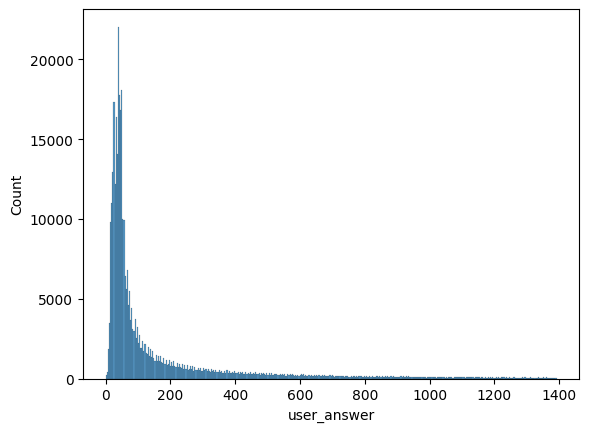

In [113]:
sns.histplot(data = unique_df, x = 'user_answer')

##### И видим заметный перекос в интервале от 0 до 100

### Выведем распределение количества ответов студентов, которое больше медианного

0.42748091603053434


<AxesSubplot: >

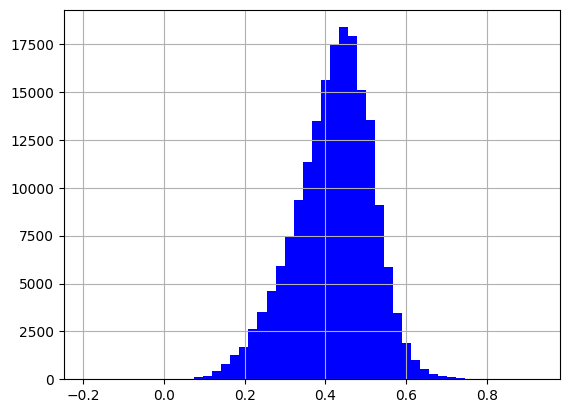

In [119]:
# Выводим распределение кол-ва ответов студентов, которое больше медианного
print(unique_df.query('user_answer > 55')['cor_ratio'].median())
unique_df.query('user_answer > 55')['cor_ratio'].hist(bins = 50, color = 'blue')

### Выведем распределение количества ответов студентов, которое которое больше 75%

0.44871794871794873


<AxesSubplot: >

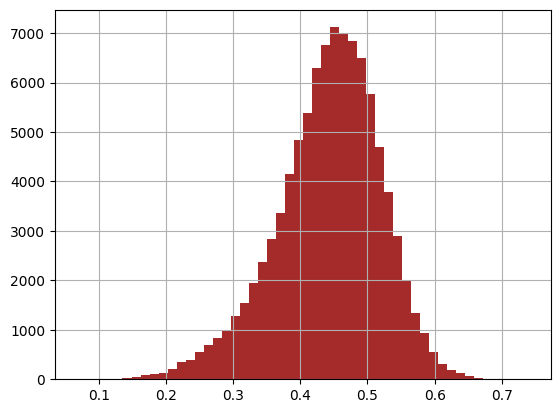

In [121]:
print(unique_df.query('user_answer > 151')['cor_ratio'].median())
unique_df.query('user_answer > 151')['cor_ratio'].hist(bins = 50, color = 'brown')

### Выведем распределение количества ответов студентов, которое больше 500

0.45819935691318325


<AxesSubplot: >

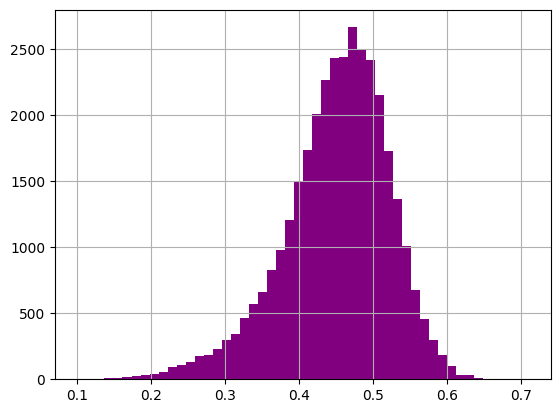

In [137]:
print(unique_df.query('user_answer > 500')['cor_ratio'].median())
unique_df.query('user_answer > 500')['cor_ratio'].hist(bins = 50, color = 'purple')

0.42168674698795183


<AxesSubplot: >

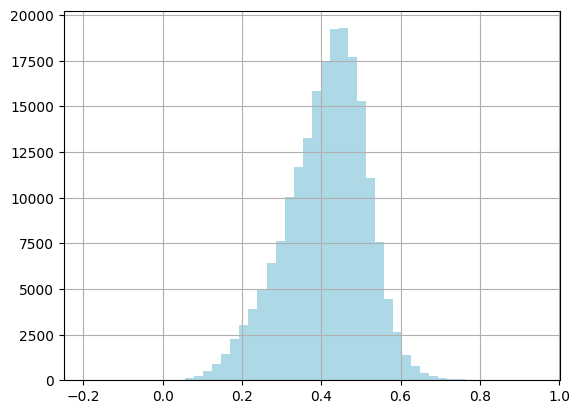

In [144]:
print(unique_df.query('0 < user_answer > 50')['cor_ratio'].median())
unique_df.query('0 < user_answer > 50')['cor_ratio'].hist(bins = 50, color = 'lightblue')

#### По вышепредставленным графикам видно, что студенты, ответившие на меньше медианного значения, справлялись хуже тех, кто ответил больше медианного значения. При этом количество ответов которое выше медианного значения незначительно сказалось на качестве, то есть на числе правильных ответов.

## Поищем взаимосвязь времени между взаимодействием со студентом и завершением первого события от него, среднего времени ответа на каждый вопрос и количества правильных ответов с общим количеством ответов студентов

##### Группируем общее кол-во ответов, кол-во правильных ответов и время ответа на каждый вопрос студентов по их идентификаторам в датафрейм corr_look

In [145]:
corr_look = df[['user_id', 'user_answer', 'answered_correctly', 'timestamp', \
    'prior_question_elapsed_time']].groupby(['user_id'], as_index = False).sum()

,user_answer,timestamp_ratio,elapsed_time_ratio,cor_ratio
0,72,6.524638e+07,12458.319444,0.444444
1,49,2.252203e+05,11122.387755,0.142857
2,31,2.472123e+05,10483.870968,0.322581
3,169,2.879101e+08,26449.704142,0.479290
4,149,2.615750e+08,18923.489933,0.449664
...,...,...,...,...
393651,308,8.478458e+08,16924.224026,0.555195
393652,1066,8.108421e+09,14109.855535,0.482176
393653,52,2.110661e+07,16903.846154,0.730769
393654,363,6.621266e+08,14765.840220,0.473829


#### Добавляем столбец timestamp_ratio соотношения времени между взаимодействием со студентом и завершением первого события от него к общему кол-ву ответов студентов

In [ ]:
corr_look['timestamp_ratio'] = corr_look['timestamp'] / corr_look['user_answer']

##### Добавляем столбец elapsed_time_ratio соотношения среднего времени ответа на каждый вопрос к общему кол-ву ответов студентов

In [ ]:
corr_look['elapsed_time_ratio'] = corr_look['prior_question_elapsed_time'] / corr_look['user_answer']

##### Добавляем столбец cor_ratio успеваемости (соотношения кол-ва правильных ответов к общему кол-ву ответов студентов)

In [ ]:
corr_look['cor_ratio'] = corr_look.answered_correctly / corr_look.user_answer

#### Удаляем ненужные столбцы

In [ ]:
corr_look.drop(corr_look.columns[[0, 2, 3, 4]], axis = 1, inplace = True)

##### Вызываем функцию сокращения разброса ответов

In [ ]:
corr_look = rem_emission(corr_look, 'user_answer', 1)

##### Проверяем произведенную работу функции и выводим выводим первые 5 и последние 5 строк полученного датафрейма corr_look

In [ ]:
corr_look 

In [153]:
# Выводим соотношение timestamp_ratio к кол-ву ответов студентов: явной связи не видно
sns.regplot(data = corr_look, x = 'user_answer', y = 'timestamp_ratio', color = 'purple')

TypeError: regplot() got an unexpected keyword argument 'x_label'

<AxesSubplot: xlabel='user_answer', ylabel='elapsed_time_ratio'>

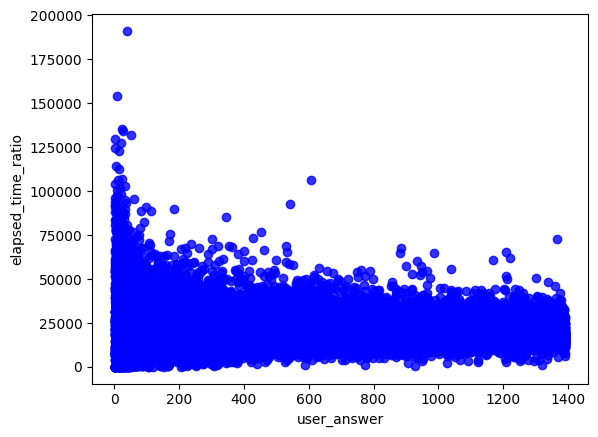

In [147]:
# Выводим соотношение elapsed_time_ratio к кол-ву ответов студентов: явной связи не видно
sns.regplot(data = corr_look, x = 'user_answer', y = 'elapsed_time_ratio', color = 'blue')

<AxesSubplot: xlabel='timestamp_ratio', ylabel='cor_ratio'>

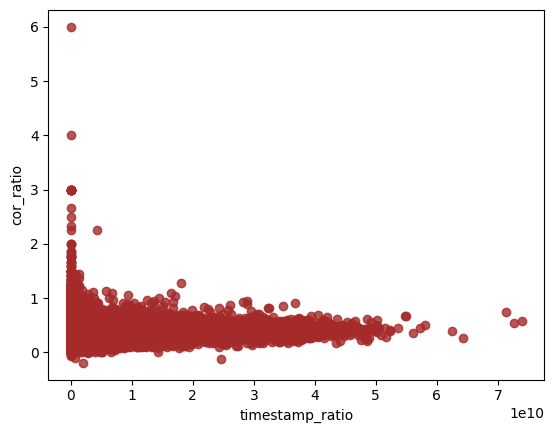

In [150]:
# Выводим соотношение timestamp_ratio к успеваемости: явной связи не видно
sns.regplot(data = corr_look, x = 'timestamp_ratio', y = 'cor_ratio', color = 'brown')

<AxesSubplot: xlabel='elapsed_time_ratio', ylabel='cor_ratio'>

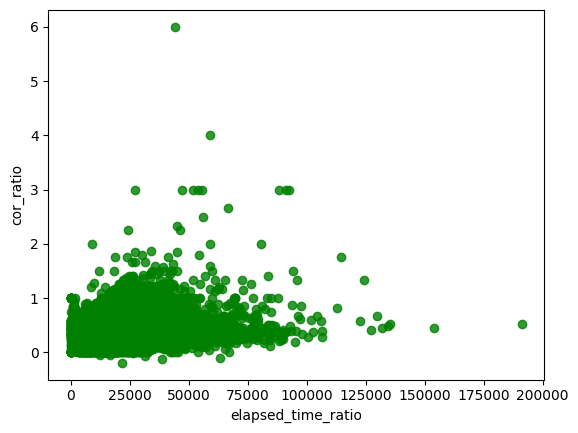

In [151]:
# Есть небольшая связь между elapsed_time_ratio и успеваемостью
sns.regplot(data = corr_look, x = 'elapsed_time_ratio', y = 'cor_ratio', color = 'green')

## Подведем краткий итог, на успеваемость студентов влияют следующие характеристики:
- количество ответов студентов, большее медианного значения количества ответов, равного 55
- типа контента (вопрос или лекция) - очень слабо
- соотношения количества правильных ответов и среднего времени ответа на каждый вопрос к общему количеству ответов студентов - слабо
